In [2]:
import json
import pandas as pd
import requests
import seaborn as sns

In [3]:
# We doen een "aanvraag" bij de API:
response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1')

In [4]:
# Checken wat voor data/type we binnen hebben gekregen
response.headers['content-type']

'application/json'

In [5]:
# Van de teruggekregen data maken we een pandas dataframe
df = pd.read_json(response.text)
df.head()

,status,total_nr_of_records,nr_of_pages,page_size,next,data
0,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 180, 'mass': 90, 'ex..."
1,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 204, 'mass': 79, 'ex..."
2,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 174, 'mass': 74, 'ex..."
3,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 187, 'mass': 78, 'ex..."
4,200,8192,82,100,http://localhost:8080/medish_centrum_randstad/...,"{'genetic': 84, 'length': 187, 'mass': 89, 'ex..."


In [6]:
df['data']

# wat we hier willen:

    # De data is opgeslagen in de 'data' kolom. De vorm waarin dit is opgeslagen is een dictionary (voor elke rij)
    # waarvan de keys de variabelen zijn, en de waardes de waardes voor elke 'patient'
    
    # Nu willen we dus elk dictionary verwerken tot een rij in het dataframe, zodat we een rij hebben voor elke patient
    

# Eerst heb ik alle dictionaries in een lijst gezet, om ze als het ware uit het "oude" dataframe te halen:

data_list = df.data.values.tolist()
    
# Hier kunnen we inspecteren hoe het eerste item, i.e., de eerste rij, eruit ziet:
print(data_list[0])
    

{'genetic': 84, 'length': 180, 'mass': 90, 'exercise': 2, 'smoking': 9, 'alcohol': 1, 'sugar': 2, 'lifespan': 86}


In [7]:
# Nu is het zaak om de dictionaries uit de gemaakte lijst allemaal samen te voegen in een datatframe

df_final = pd.DataFrame.from_dict(data_list)

# We kunnen ons nieuwe dataframe even bekijken:

print(df_final.head())
print()
print(df_final.tail())


   genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
0     84.0   180.0  90.0       2.0      9.0      1.0      2        86
1     84.0   204.0  79.0       3.0      2.0      7.0      3       100
2     84.0   174.0  74.0       3.0     20.0      3.0      2        87
3     84.0   187.0  78.0       2.0      6.0      5.0      3        91
4     84.0   187.0  89.0       2.0     12.0      0.0      2        83

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
8187     82.0   185.0  67.0       3.0     11.0      8.0      2        90
8188     82.0   183.0  72.0       2.0      1.0      5.0      4        88
8189     83.0   192.0  92.0       1.0     22.0      2.0      4        62
8190     81.0   175.0  60.0       3.0     13.0      7.0      2        93
8191     83.0   204.0  76.0       3.0      8.0      8.0      1        96


In [8]:
# Wat opvalt is dat het dataframe enigszins lijkt te zijn geordend, bij het eerst x aantal rijen zien we dit terug:
df_final.head(50)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83
5,84.0,175.0,74.0,2.0,2.0,3.0,3,89
6,84.0,196.0,68.0,2.0,14.0,8.0,1,80
7,84.0,182.0,83.0,1.0,1.0,8.0,3,77
8,84.0,176.0,91.0,1.0,17.0,1.0,2,73
9,84.0,180.0,74.0,1.0,5.0,9.0,2,73


In [9]:
# Om eventuele problemen met training/test subsets van de data te voorkomen, heb ik ervoor gekozen om de rijen
# in willekeurige volgorden te zetten:

df_final = df_final.sample(frac=1)

In [10]:
# Checken hoe het er nu uitziet:

print(df_final.head())
print()
print(df_final.tail())

# De rijen zijn nu inderdaad in willekeurige volgorde gezet.

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
1193     81.0   190.0  76.0       1.0     18.0      9.0      2        64
4552     81.0   171.0  85.0       2.0     20.0      9.0      3        70
2527     80.0   172.0  71.0       1.0     16.0      1.0      3        69
402      82.0   170.0  75.0       1.0      4.0      1.0      3        81
5814     80.0   169.0  82.0       1.0      0.0      2.0      3        78

      genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
5764     78.0   213.0   66.0       1.0      7.0      9.0      2        75
7982     80.0   164.0   78.0       1.0     14.0      7.0      2        65
5755     78.0   188.0  100.0       1.0     16.0      6.0      3        59
1706     80.0   185.0   73.0       1.0      8.0      5.0      2        74
1841     80.0   177.0  107.0       2.0      4.0      5.0      3        80


In [11]:
# We hebben nu een werkbaar dataframe met al onze variabelen in de kolommen, en alle individuele patienten/datapunten
# in de rijen. We kunnen deze nu als een nieuwe csv file exporteren, zonder index:

df_final.to_csv('data_clean.csv', index=False, sep=';')

array([[<AxesSubplot: title={'center': 'genetic'}>,
        <AxesSubplot: title={'center': 'length'}>,
        <AxesSubplot: title={'center': 'mass'}>],
       [<AxesSubplot: title={'center': 'exercise'}>,
        <AxesSubplot: title={'center': 'smoking'}>,
        <AxesSubplot: title={'center': 'alcohol'}>],
       [<AxesSubplot: title={'center': 'sugar'}>,
        <AxesSubplot: title={'center': 'lifespan'}>, <AxesSubplot: >]],
      dtype=object)

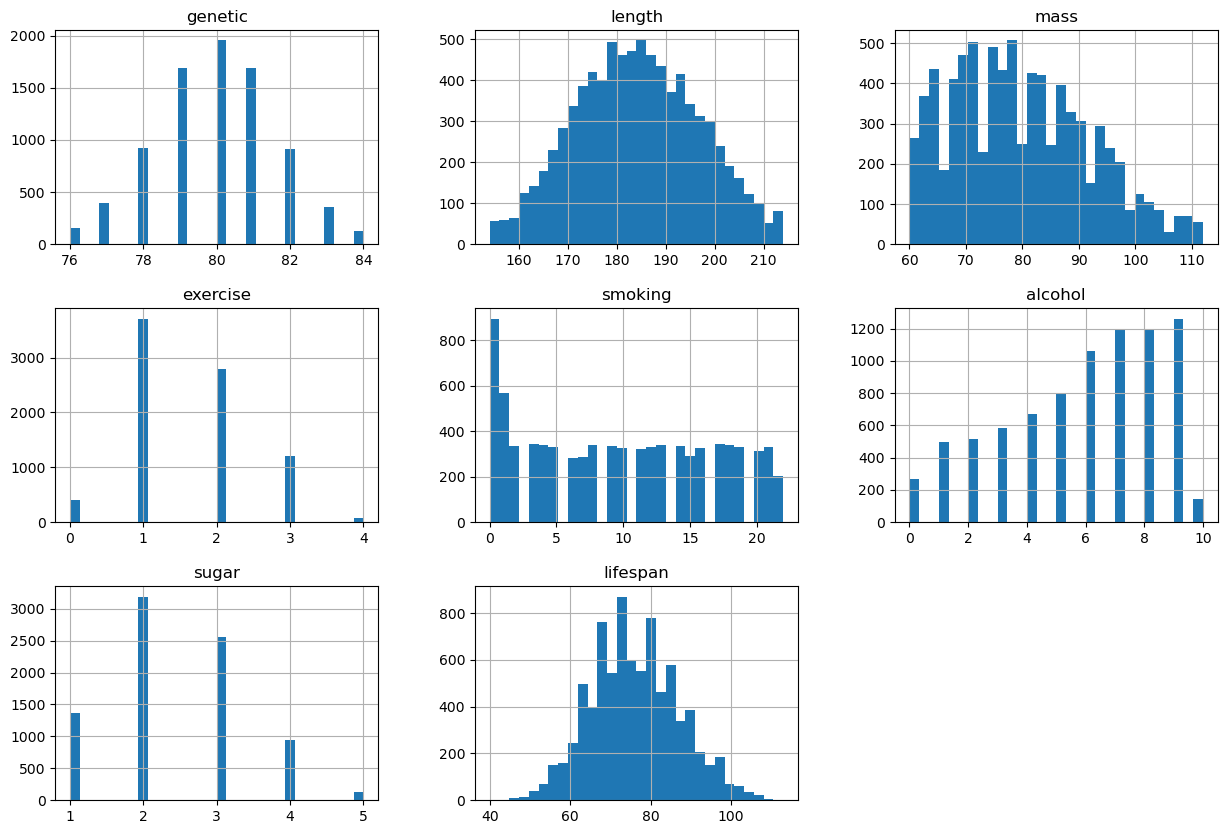

In [12]:
# Nu hebben we dus ons dataframe en kunnen we kijken of we kunnen cluseren

# We kunnen eerst een aantal variabelen in een histogram plotten om te zien hoe ze verdeeld zijn:

df_final.hist(bins=30, figsize=(15, 10))

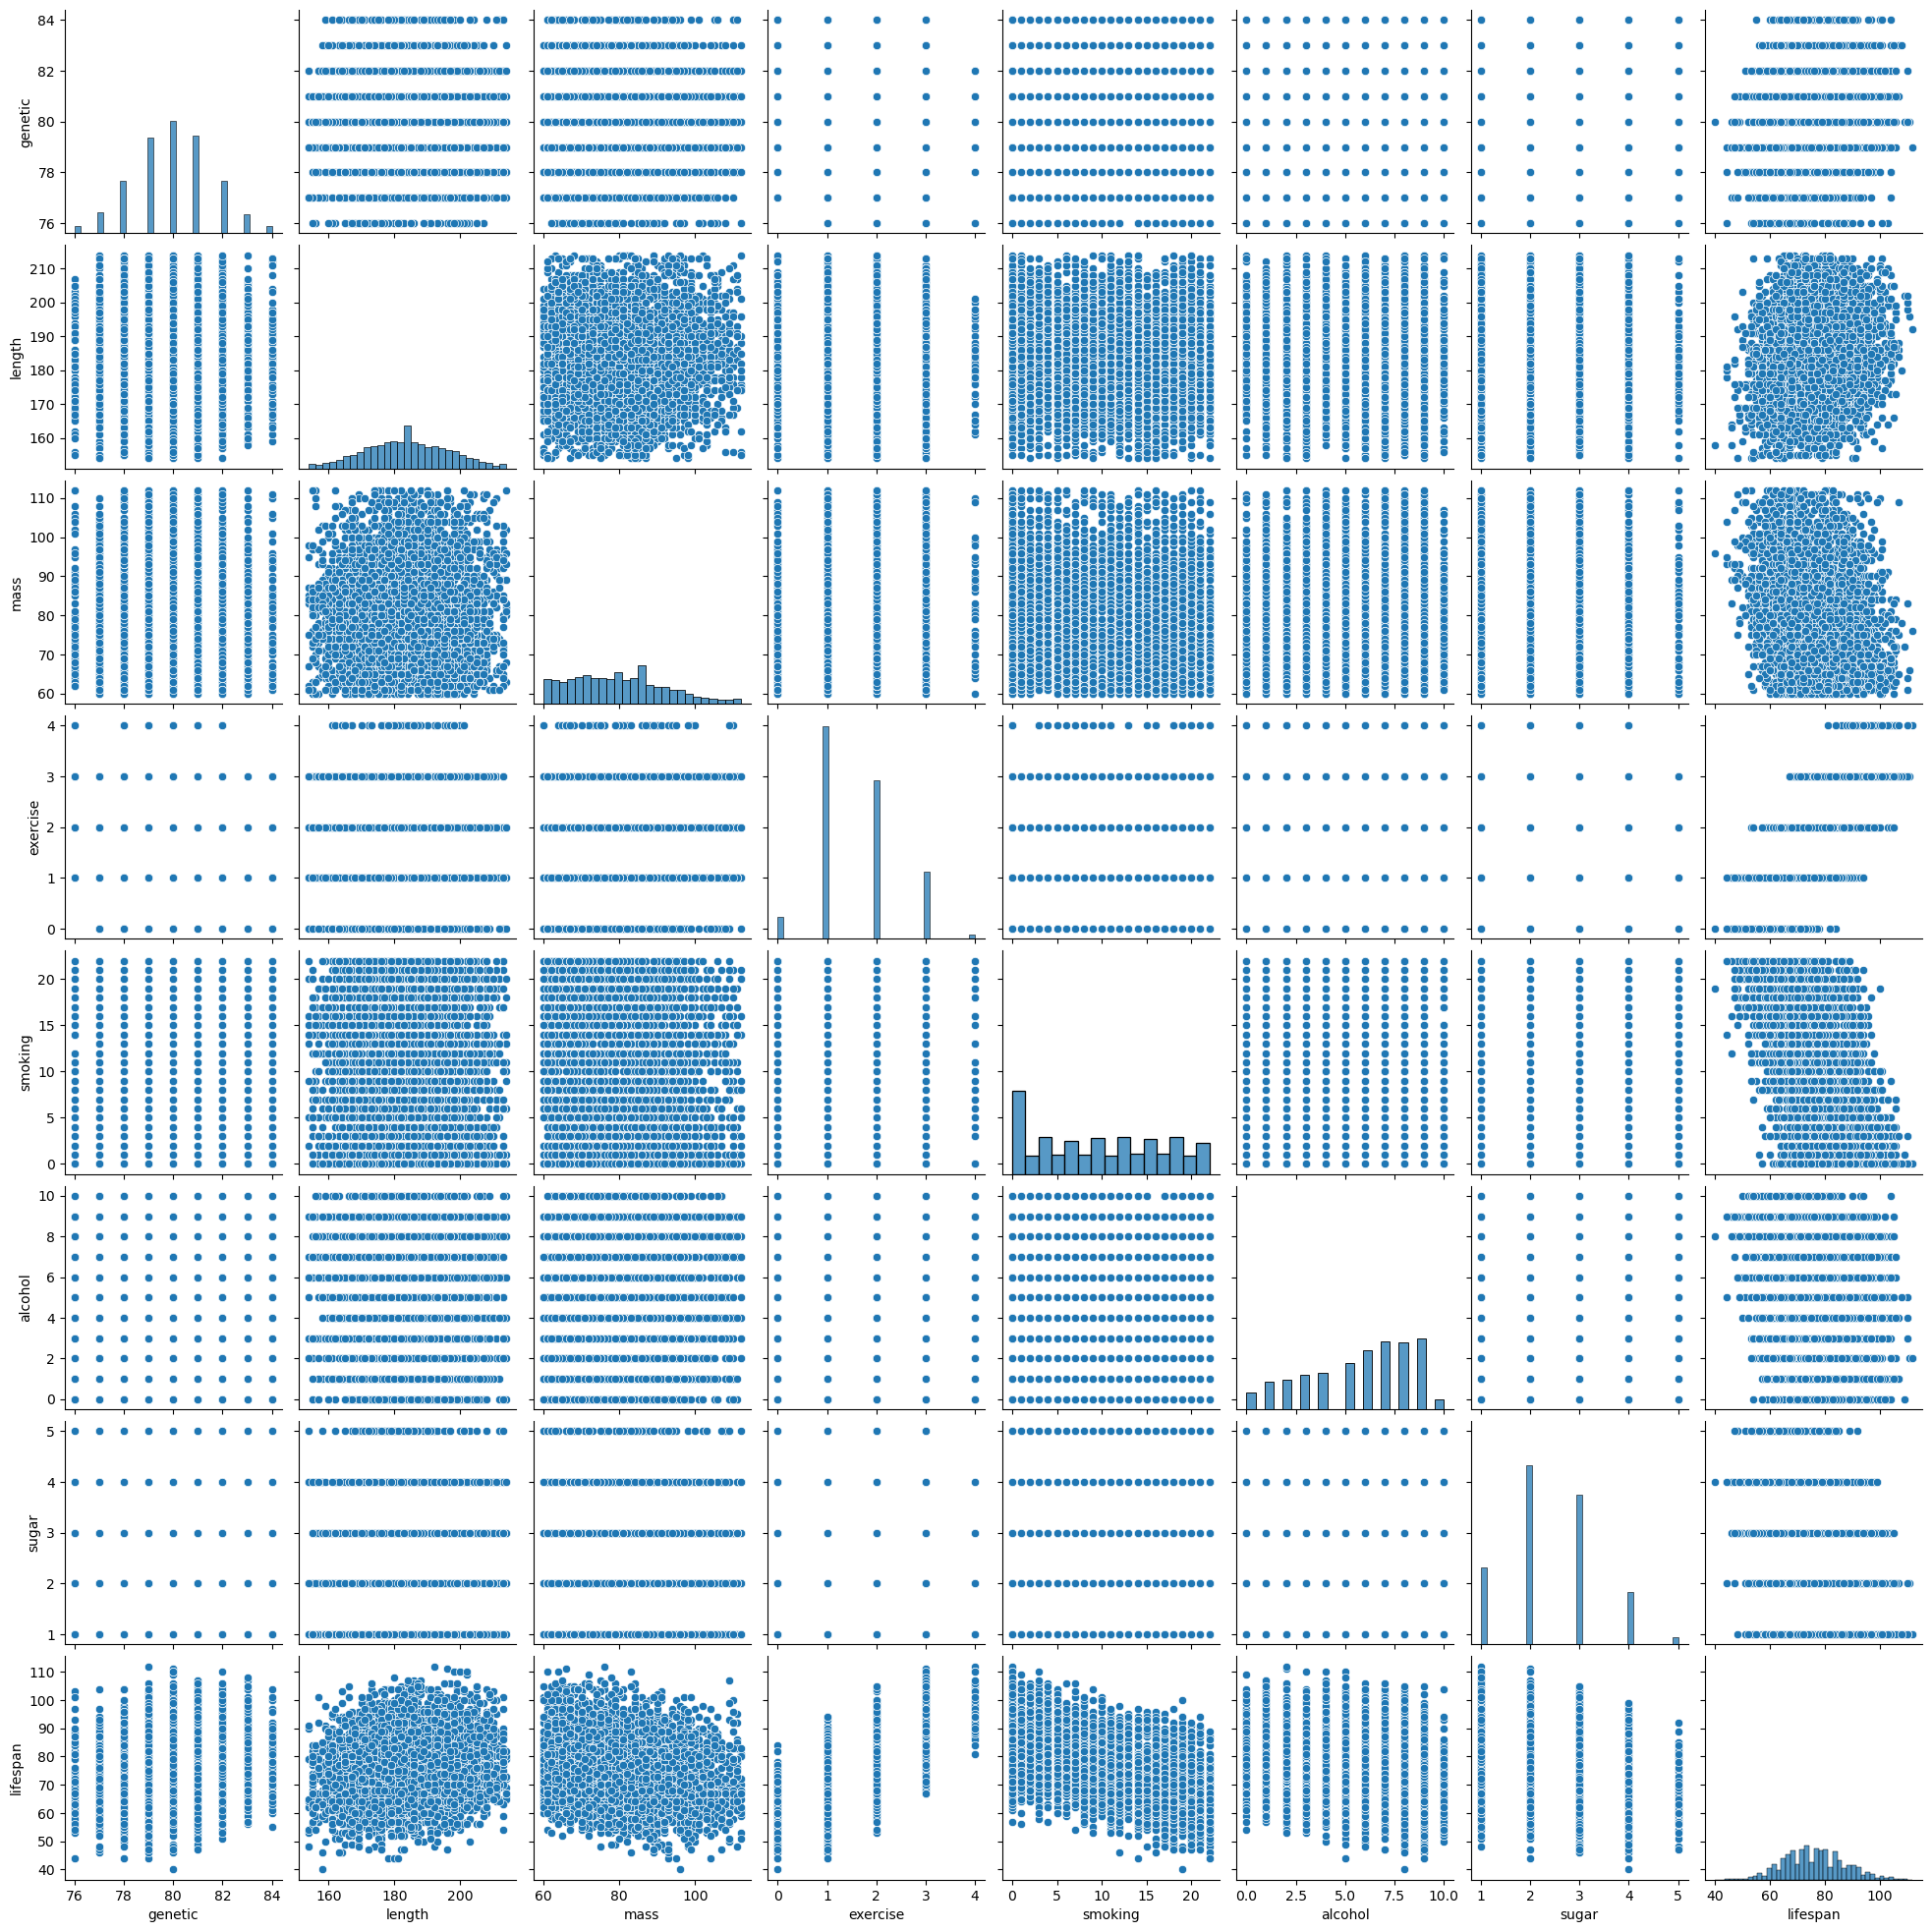

In [28]:
#We kunnen ook een eerste blik werpen op eventuele onderlinge verbanden door een pairplot te maken van alle variabelen:
sns.pairplot(df_final.sample(5000))